# Audio Signal for Machine Learning

## Introduction

#### Hey there! This notebook serves as an introduction to Librosa, a powerful Python library for audio analysis and music processing. It aims to provide a hands-on approach to understanding the digital representation of audio signals and the tools available for processing and analyzing them. 

### Signal Representation and Sampling

- Sampling: In digital signal processing, we convert a continuous signal into a discrete signal by taking samples at specific intervals along the time axis. This process is called sampling, sampling essentially converts the signal into a series of data points taken at specific time intervals.
- Quantization: After sampling, the signal undergoes a process called quantization, which involves converting the sampled values into discrete levels. This process is represented by indicating the transformation from continuous amplitude values (A) into discrete steps.

### The Nyquist-Shannon Theorem
- The Nyquist-Shannon Theorem states that in order to accurately represent a signal, the sampling frequency must be at least twice the frequency of the highest frequency present in the signal. For audible sounds, humans can hear frequencies ranging from 20 Hz to 20 kHz, which means that the sampling frequency should be at least 40 kHz.

### 1. Requirements

In [21]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [22]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Carregar exemplo de áudio
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path)

In [24]:
# Reproduzir o áudio
import IPython.display as ipd
ipd.Audio(y, rate=sr)

### 2. Visualization / Audio Features

#### 2.1. Waveform - Time Domain

##### y(t) = Asin(2πft + phi) - A: amplitude | f: frequence | phi: phase

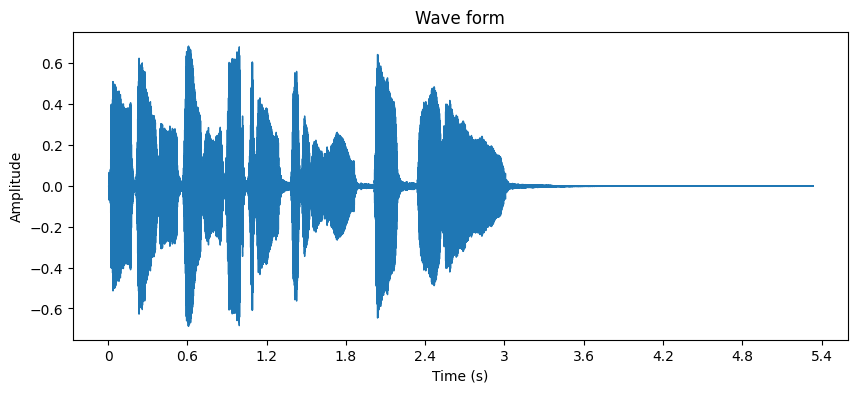

In [25]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Wave form")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#### 2.2. Spectrogram

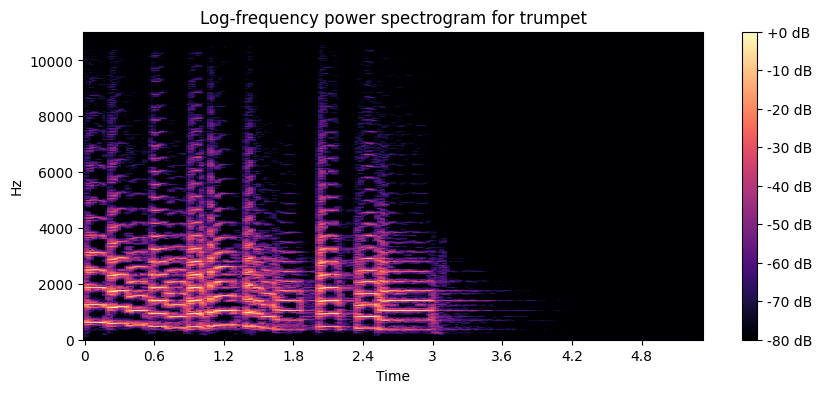

In [26]:
D = librosa.stft(y)  # Transformada de Fourier
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Log-frequency power spectrogram for trumpet")
plt.show()

#### 2.3. Mel-Spectogram

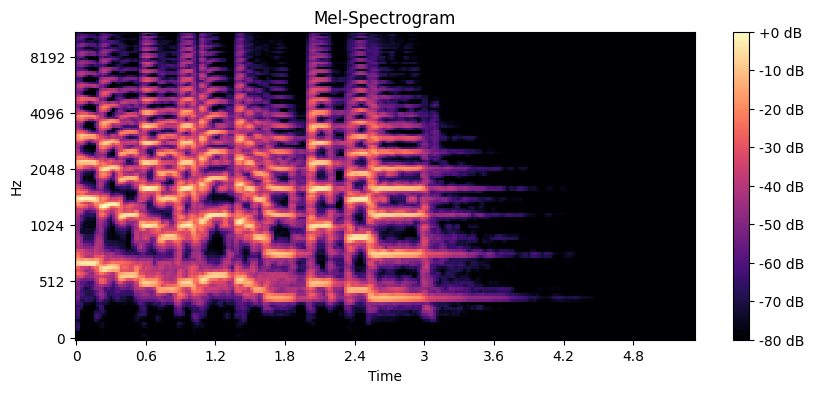

In [27]:
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram")
plt.show()

#### 2.4. MFCCs Extraction

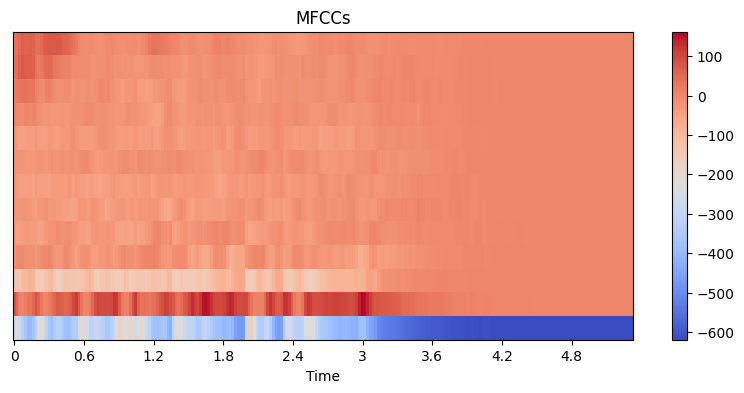

In [28]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.show()

#### 2.5. Rhythm Detection (BPM)

In [29]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo estimado: {tempo} BPM")

Tempo estimado: [184.5703125] BPM


#### 2.6. Pitch and Speed

##### Changing the Pitch - Raising by 4 Semitones

In [30]:
y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=4) 
ipd.Audio(y_shifted, rate=sr)

##### Changing the Speed - Slowing Down (80% of the original)

In [31]:
y_stretched = librosa.effects.time_stretch(y, rate=0.8)  
ipd.Audio(y_stretched, rate=sr)

#### 2.7. Magnitude Spectrum - Frequence Domain

In [32]:
X = np.fft.fft(y)

In [33]:
X_mag = np.absolute(X)
f = np.linspace(0, sr, len(X_mag))

Text(0.5, 0, 'Frequency (Hz)')

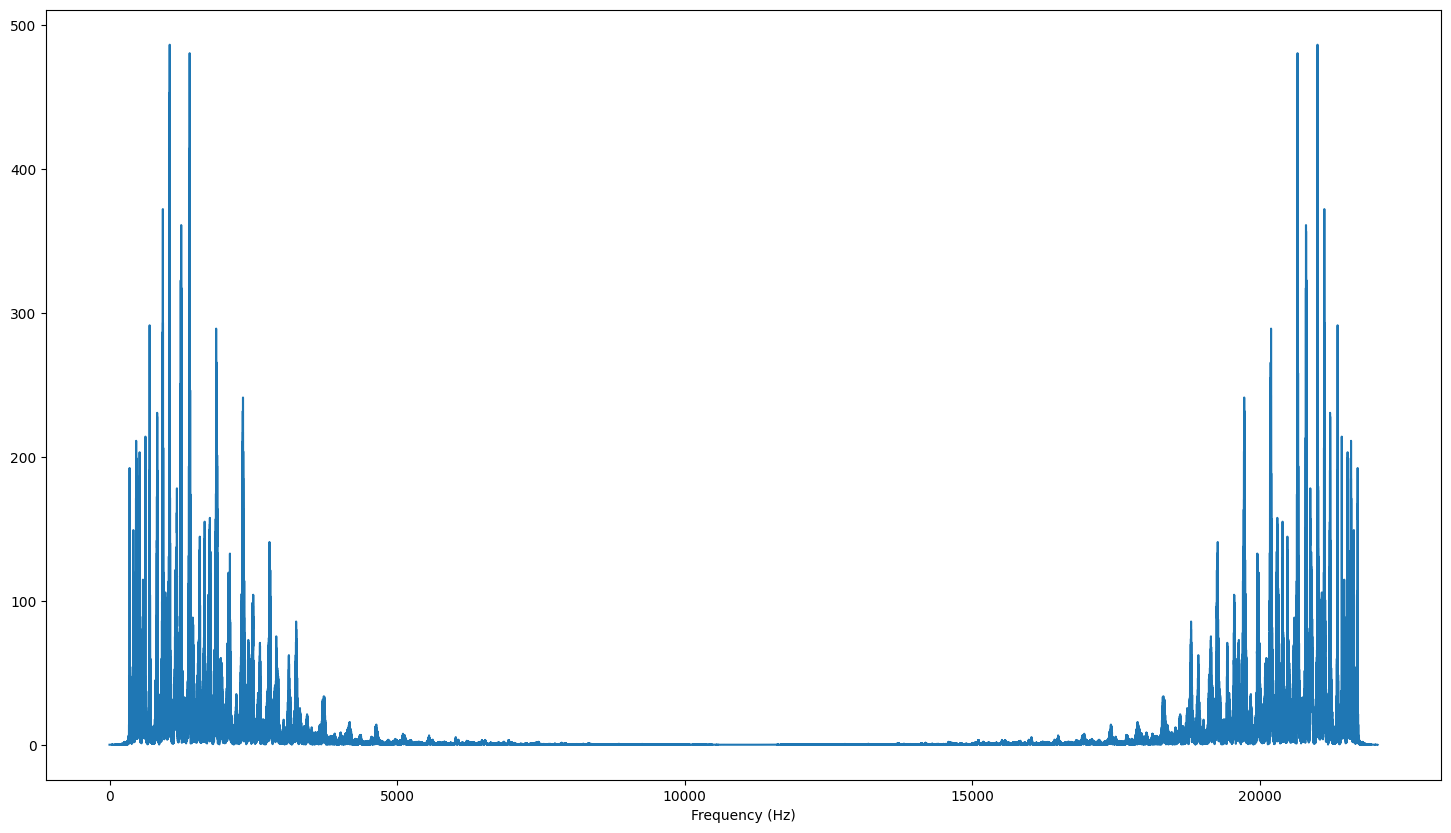

In [34]:
plt.figure(figsize=(18, 10))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')